In [18]:
import torch
import matplotlib.pyplot as plt

import src.models as models
from src.audio_dataset import get_dataloader
from src.trainer import Trainer

In [19]:
# Initialize the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Trained on raw signal
wavecnn5 = getattr(models, 'WaveCNN5')
wavecnn5 = wavecnn5().to(device)

wavecnn7 = getattr(models, 'WaveCNN7')
wavecnn7 = wavecnn7().to(device)

wavecnn9 = getattr(models, 'WaveCNN9')
wavecnn9 = wavecnn9().to(device)

# Trained on mel specs
melcnn3 = getattr(models, 'FCN3')
melcnn3 = melcnn3().to(device)

melcnn4 = getattr(models, 'FCN4')
melcnn4 = melcnn4().to(device)

melcnn5 = getattr(models, 'FCN5')
melcnn5 = melcnn5().to(device)

melcnn7 = getattr(models, 'FCN7')
melcnn7 = melcnn7().to(device)


In [20]:
# Initialize the Trainer
# Trained on raw signal
trainer5 = Trainer(wavecnn5, train_loader=None, valid_loader=None, learning_rate=0.001, device=device)
trainer5.load_model('../models/WaveCNN5_final_no_L2_20231129-0723.pth')

trainer5_l2 = Trainer(wavecnn5, train_loader=None, valid_loader=None, learning_rate=0.001, device=device)
trainer5_l2.load_model('../models/WaveCNN5_final_20231202-0017.pth')

trainer7 = Trainer(wavecnn7, train_loader=None, valid_loader=None, learning_rate=0.001, device=device)
trainer7.load_model('../models/WaveCNN7_final_no_L2_20231129-0825.pth')

trainer7_l2 = Trainer(wavecnn7, train_loader=None, valid_loader=None, learning_rate=0.001, device=device)
trainer7_l2.load_model('../models/WaveCNN7_final_20231202-0259.pth')

trainer9 = Trainer(wavecnn9, train_loader=None, valid_loader=None, learning_rate=0.001, device=device)
trainer9.load_model('../models/WaveCNN9_final_no_L2_20231130-2232.pth')

trainer9_l2 = Trainer(wavecnn9, train_loader=None, valid_loader=None, learning_rate=0.001, device=device)
trainer9_l2.load_model('../models/WaveCNN9_final_20231202-0251.pth')

# Trained on mel specs
trainer_mel3 = Trainer(melcnn3, train_loader=None, valid_loader=None, learning_rate=0.001, device=device)
trainer_mel3.load_model('../models/FCN3_final_no_l2_20231130-2114.pth')

trainer_mel3_l2 = Trainer(melcnn3, train_loader=None, valid_loader=None, learning_rate=0.001, device=device)
trainer_mel3_l2.load_model('../models/FCN3_final_l2_20231201-2129.pth')

trainer_mel4 = Trainer(melcnn4, train_loader=None, valid_loader=None, learning_rate=0.001, device=device)
trainer_mel4.load_model('../models/FCN4_final_no_l2_20231201-2219.pth')

trainer_mel4_l2 = Trainer(melcnn4, train_loader=None, valid_loader=None, learning_rate=0.001, device=device)
trainer_mel4_l2.load_model('../models/FCN4_final_l2_20231201-2126.pth')

trainer_mel5 = Trainer(melcnn5, train_loader=None, valid_loader=None, learning_rate=0.001, device=device)
trainer_mel5.load_model('../models/FCN5_final_no_L2_20231130-1948.pth')

trainer_mel5_l2 = Trainer(melcnn5, train_loader=None, valid_loader=None, learning_rate=0.001, device=device)
trainer_mel5_l2.load_model('../models/FCN5_final_l2_20231201-2127.pth')

trainer_mel7_l2 = Trainer(melcnn7, train_loader=None, valid_loader=None, learning_rate=0.001, device=device)
trainer_mel7_l2.load_model('../models/FCN7_final_l2_20231201-2215.pth')

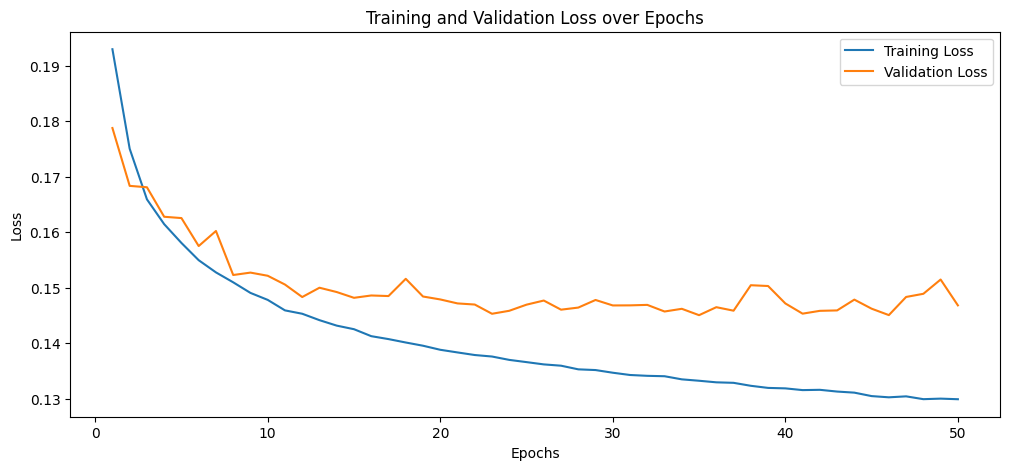

In [30]:
# TODO @Luca, feel free to play around with plotting multiple models to show overfitting still

# Epoch range
epochs = range(1, 51) 

plt.figure(figsize=(12, 5))
plt.plot(epochs, trainer7_l2.history['train_loss'], label='Training Loss')
plt.plot(epochs, trainer7_l2.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

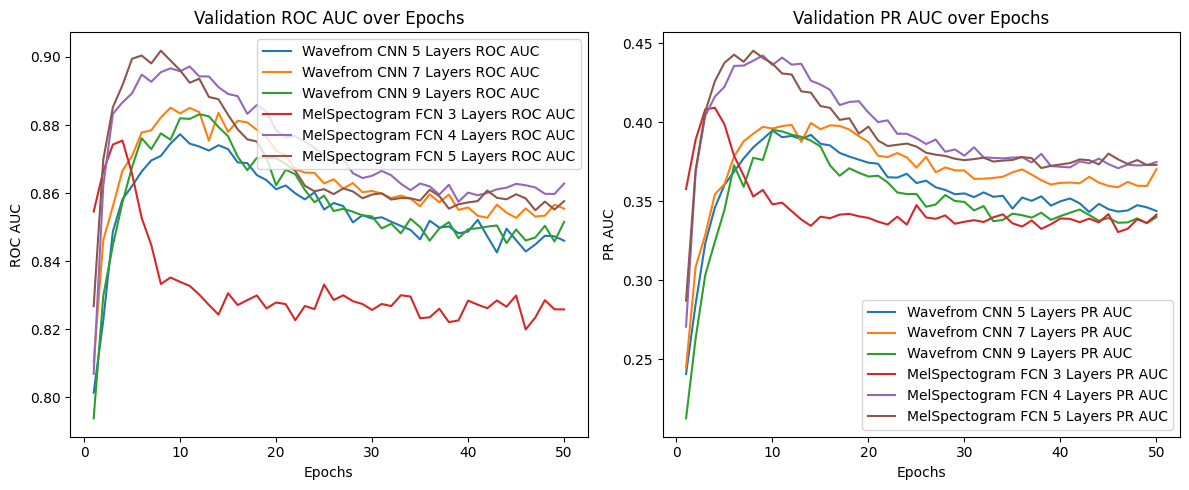

In [31]:
# Sample data
# Replace these with your actual data
epochs = range(1, 51)  # Example epoch range from 1 to 10

# Plotting
plt.figure(figsize=(12, 5))

# Plot for val_roc_auc
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.plot(epochs, trainer5.history['val_roc_auc'], label='Wavefrom CNN 5 Layers ROC AUC')
plt.plot(epochs, trainer7.history['val_roc_auc'], label='Wavefrom CNN 7 Layers ROC AUC')
plt.plot(epochs, trainer9.history['val_roc_auc'], label='Wavefrom CNN 9 Layers ROC AUC')
plt.plot(epochs, trainer_mel3.history['val_roc_auc'], label='MelSpectogram FCN 3 Layers ROC AUC')
plt.plot(epochs, trainer_mel4.history['val_roc_auc'], label='MelSpectogram FCN 4 Layers ROC AUC')
plt.plot(epochs, trainer_mel5.history['val_roc_auc'], label='MelSpectogram FCN 5 Layers ROC AUC')
plt.title('Validation ROC AUC over Epochs')
plt.xlabel('Epochs')
plt.ylabel('ROC AUC')
plt.legend()

# Plot for val_pr_auc
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.plot(epochs, trainer5.history['val_pr_auc'], label='Wavefrom CNN 5 Layers PR AUC')
plt.plot(epochs, trainer7.history['val_pr_auc'], label='Wavefrom CNN 7 Layers PR AUC')
plt.plot(epochs, trainer9.history['val_pr_auc'], label='Wavefrom CNN 9 Layers PR AUC')
plt.plot(epochs, trainer_mel3.history['val_pr_auc'], label='MelSpectogram FCN 3 Layers PR AUC')
plt.plot(epochs, trainer_mel4.history['val_pr_auc'], label='MelSpectogram FCN 4 Layers PR AUC')
plt.plot(epochs, trainer_mel5.history['val_pr_auc'], label='MelSpectogram FCN 5 Layers PR AUC')
plt.title('Validation PR AUC over Epochs')
plt.xlabel('Epochs')
plt.ylabel('PR AUC')
plt.legend()

plt.tight_layout()
plt.show()

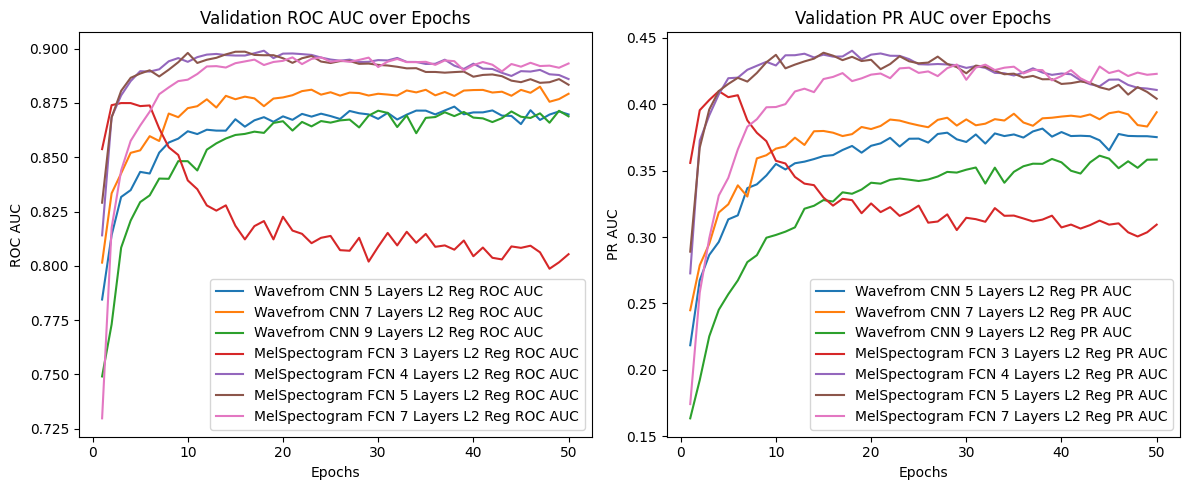

In [32]:
# Same for with L2
# Replace these with your actual data
epochs = range(1, 51)  # Example epoch range from 1 to 10

# Plotting
plt.figure(figsize=(12, 5))

# Plot for val_roc_auc
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.plot(epochs, trainer5_l2.history['val_roc_auc'], label='Wavefrom CNN 5 Layers L2 Reg ROC AUC')
plt.plot(epochs, trainer7_l2.history['val_roc_auc'], label='Wavefrom CNN 7 Layers L2 Reg ROC AUC')
plt.plot(epochs, trainer9_l2.history['val_roc_auc'], label='Wavefrom CNN 9 Layers L2 Reg ROC AUC')
plt.plot(epochs, trainer_mel3_l2.history['val_roc_auc'], label='MelSpectogram FCN 3 Layers L2 Reg ROC AUC')
plt.plot(epochs, trainer_mel4_l2.history['val_roc_auc'], label='MelSpectogram FCN 4 Layers L2 Reg ROC AUC')
plt.plot(epochs, trainer_mel5_l2.history['val_roc_auc'], label='MelSpectogram FCN 5 Layers L2 Reg ROC AUC')
plt.plot(epochs, trainer_mel7_l2.history['val_roc_auc'], label='MelSpectogram FCN 7 Layers L2 Reg ROC AUC')
plt.title('Validation ROC AUC over Epochs')
plt.xlabel('Epochs')
plt.ylabel('ROC AUC')
plt.legend()

# Plot for val_pr_auc
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.plot(epochs, trainer5_l2.history['val_pr_auc'], label='Wavefrom CNN 5 Layers L2 Reg PR AUC')
plt.plot(epochs, trainer7_l2.history['val_pr_auc'], label='Wavefrom CNN 7 Layers L2 Reg PR AUC')
plt.plot(epochs, trainer9_l2.history['val_pr_auc'], label='Wavefrom CNN 9 Layers L2 Reg PR AUC')
plt.plot(epochs, trainer_mel3_l2.history['val_pr_auc'], label='MelSpectogram FCN 3 Layers L2 Reg PR AUC')
plt.plot(epochs, trainer_mel4_l2.history['val_pr_auc'], label='MelSpectogram FCN 4 Layers L2 Reg PR AUC')
plt.plot(epochs, trainer_mel5_l2.history['val_pr_auc'], label='MelSpectogram FCN 5 Layers L2 Reg PR AUC')
plt.plot(epochs, trainer_mel7_l2.history['val_pr_auc'], label='MelSpectogram FCN 7 Layers L2 Reg PR AUC')
plt.title('Validation PR AUC over Epochs')
plt.xlabel('Epochs')
plt.ylabel('PR AUC')
plt.legend()

plt.tight_layout()
plt.show()


### Evaluate

In [16]:
test_annotations = 'mtat_test_label.csv'
data_dir = '../data'
    
# Ealuate the model on the test set
test_loader = get_dataloader(
    annotations_file=test_annotations,
    data_dir=data_dir,
    batch_size=32,
    shuffle=False,
    num_workers=0,
    sample_rate=16000,
    target_length=29.1,
)


In [17]:
# Instantiate models and load BEST model (THIS TIME BEST MODEL INSTEAD OF FINAL MODEL)
# load only best model (see filenames) to ensure we evaluate with best epoch
# only use regularized models
# raw
trainer5_l2 = Trainer(wavecnn5, train_loader=None, valid_loader=None, learning_rate=0.001, device=device)
trainer5_l2.load_model('../models/WaveCNN5_best_20231202-0017.pth')

trainer7_l2 = Trainer(wavecnn7, train_loader=None, valid_loader=None, learning_rate=0.001, device=device)
trainer7_l2.load_model('../models/WaveCNN7_best_20231202-0259.pth')

trainer9_l2 = Trainer(wavecnn9, train_loader=None, valid_loader=None, learning_rate=0.001, device=device)
trainer9_l2.load_model('../models/WaveCNN9_best_20231202-0251.pth')

# spec
trainer_mel3_l2 = Trainer(melcnn3, train_loader=None, valid_loader=None, learning_rate=0.001, device=device)
trainer_mel3_l2.load_model('../models/FCN3_best_l2_20231201-2129.pth')

trainer_mel4_l2 = Trainer(melcnn4, train_loader=None, valid_loader=None, learning_rate=0.001, device=device)
trainer_mel4_l2.load_model('../models/FCN4_best_l2_20231201-2126.pth')

trainer_mel5_l2 = Trainer(melcnn5, train_loader=None, valid_loader=None, learning_rate=0.001, device=device)
trainer_mel5_l2.load_model('../models/FCN5_best_l2_20231201-2127.pth')

trainer_mel7_l2 = Trainer(melcnn7, train_loader=None, valid_loader=None, learning_rate=0.001, device=device)
trainer_mel7_l2.load_model('../models/FCN7_best_l2_20231201-2215.pth')


In [ ]:
# Load evaluation metrics (will take long, maybe split into different cells)
# TODO @Luca adjust variables
avg_loss, roc_auc, pr_auc, predicted_labels, true_labels, filepaths = trainer5_l2.evaluate(test_loader)
avg_loss, roc_auc, pr_auc, predicted_labels, true_labels, filepaths = trainer7_l2.evaluate(test_loader)
avg_loss, roc_auc, pr_auc, predicted_labels, true_labels, filepaths = trainer9_l2.evaluate(test_loader)

avg_loss, roc_auc, pr_auc, predicted_labels, true_labels, filepaths = trainer_mel3_l2.evaluate(test_loader)
avg_loss, roc_auc, pr_auc, predicted_labels, true_labels, filepaths = trainer_mel4_l2.evaluate(test_loader)
avg_loss, roc_auc, pr_auc, predicted_labels, true_labels, filepaths = trainer_mel5_l2.evaluate(test_loader)
avg_loss, roc_auc, pr_auc, predicted_labels, true_labels, filepaths = trainer_mel7_l2.evaluate(test_loader)